In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import core_v2 as pdt
import dataloader as dal
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn')
#plt.style.use('seaborn-whitegrid')
#sns.set_style("white")

# 设置matplotlib正常显示中文
# https://zhuanlan.zhihu.com/p/480348215
# 一些默认配置，使得图表更美观
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)

plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False 
sns.set_palette('coolwarm')
tdt = pd.to_datetime

_FLATUI_COLORS = ["#fedd78", "#348dc1", "#af4b64",
                  "#4fa487", "#9b59b6", "#808080"]

In [ ]:
def get_data(data,code,start,end):
    return data[(data.code==code)&(data.date<=tdt(end))&(data.date>=tdt(start))]

In [3]:
dl = dal.dataloader()
dl.sdata = pd.read_csv('hs300.csv',index_col=0,dtype={'code':str})
dl.sdata.date = tdt(dl.sdata.date)
dl.sdata = dl.sdata[(dl.sdata.date>tdt("2018/01/01"))&(dl.sdata.date<tdt('2021/01/31'))]
dl.sdata.set_index(['date','code'],inplace= True)

In [4]:
dl.add_factor(dal.alpha_6(dl.sdata),'factor1')
dl.add_factor(dal.alpha_17(dl.sdata),'factor2')
dl.add_factor(dal.momentum_nd(dl.sdata,3),'factor3')

In [5]:
dl.first_n_todict('factor1',5)
dl.first_n_todict('factor2',5)
dl.first_n_todict('factor3',5)
dl.trade['factor2'][tdt('2018-09-10')]

Index(['600519', '600583', '601225', '000895', '002074'], dtype='object', name='code')

In [6]:
core = pdt.PDcerebro(dl.sdata,100000)
core.data

,date,code,open,high,low,close,volume,amount,factor1,factor2,factor3
5609,2018-01-16,000001,13.26,13.47,13.11,13.29,244454896.0,3.479176e+09,-0.489628,-0.092778,0.73
5643,2018-01-16,000002,31.31,35.51,31.21,35.01,97846400.0,3.763499e+09,0.318195,-0.081236,1.42
5677,2018-01-16,000008,8.32,8.46,8.25,8.41,7720467.0,6.522997e+07,0.152196,-0.025808,-0.04
5711,2018-01-16,000060,6.98,7.00,6.80,6.90,42162822.0,4.682911e+08,0.346178,-0.053464,-0.08
5766,2018-01-16,000069,8.24,8.91,8.15,8.27,194290110.0,1.952290e+09,0.064713,-0.028589,0.30
...,...,...,...,...,...,...,...,...,...,...,...
197191,2021-01-29,603993,5.94,6.07,5.63,5.96,343091535.0,2.058130e+09,-0.135150,-0.373972,-0.77
197259,2021-01-29,688008,88.18,89.18,85.41,86.91,4046631.0,3.552799e+08,-0.571238,-0.010890,-1.92
197327,2021-01-29,688009,5.46,5.48,5.35,5.39,21163955.0,1.224310e+08,-0.889408,-0.154995,-0.05
197382,2021-01-29,688012,160.60,162.00,151.80,153.55,4451729.0,6.911111e+08,-0.620919,-0.222974,-10.71


In [7]:
core.data[(core.data.code=='002202')&(core.data.date>'2019-03-17')]

,date,code,open,high,low,close,volume,amount,factor1,factor2,factor3
108241,2019-03-18,002202,13.13,13.29,12.38,12.81,60122868.0,9.006708e+08,0.352656,-0.164309,-0.29
108242,2019-03-19,002202,12.70,12.78,12.45,12.55,43525030.0,6.401461e+08,0.374121,-0.005756,-0.20
108243,2019-03-20,002202,12.94,13.78,12.90,13.70,114100431.0,1.805485e+09,0.129576,-0.231151,0.04
108244,2019-03-29,002202,12.74,13.80,12.25,13.64,79285243.0,1.103619e+09,0.039336,-0.642023,0.67
108245,2019-04-01,002202,13.57,14.04,13.09,13.69,105979777.0,1.509911e+09,0.115399,-0.001010,0.83
...,...,...,...,...,...,...,...,...,...,...,...
201533,2021-01-25,002202,16.32,17.41,16.21,16.44,187741418.0,3.227124e+09,-0.746264,-0.289141,2.47
201534,2021-01-26,002202,16.31,16.73,15.84,16.18,123530851.0,2.069946e+09,-0.800432,-0.044811,1.84
201535,2021-01-27,002202,16.18,16.18,15.12,15.63,142423476.0,2.279103e+09,-0.691241,-0.307825,1.33
201536,2021-01-28,002202,15.30,15.43,14.40,14.49,141483986.0,2.162776e+09,-0.725755,-0.097127,-0.69


In [8]:
core.add_strategy(pdt.buy_n_value(dl.trade['factor1']))
core.add_strategy(pdt.buy_n_value(dl.trade['factor2']))
core.add_strategy(pdt.buy_n_value(dl.trade['factor3']))

In [9]:
core.strategy[0].verbose = False
core.strategy[1].verbose = False
core.strategy[2].verbose = False

In [10]:
core.strategy[1].date_trade[tdt('2019-03-20')]

Index(['600674', '600688', '600795', '000725', '300413'], dtype='object', name='code')

In [11]:
core.run()

Date 2018-01-16 00:00:00 | Code 000725 | Amount 1686.0 | New
Date 2018-01-16 00:00:00 | Code 000839 | Amount 1161.0 | New
Date 2018-01-16 00:00:00 | Code 002304 | Amount 84.0 | New
Date 2018-01-16 00:00:00 | Code 002466 | Amount 247.0 | New
Date 2018-01-16 00:00:00 | Code 300315 | Amount 1715.0 | New
Date 2018-01-16 00:00:00 | Code 600038 | Amount 250.0 | New
Date 2018-01-16 00:00:00 | Code 600352 | Amount 904.0 | New
Date 2018-01-16 00:00:00 | Code 600739 | Amount 581.0 | New
Date 2018-01-16 00:00:00 | Code 601009 | Amount 1552.0 | New
Date 2018-01-16 00:00:00 | Code 601228 | Amount 1683.0 | New
Not enough money| 2018-01-16 00:00:00 601958
Not enough money| 2018-01-16 00:00:00 601966
Not enough money| 2018-01-16 00:00:00 601997
Not enough money| 2018-01-16 00:00:00 603160
Date 2018-01-17 00:00:00 | Code 000725 | Amount 1686.0 | Clear
Date 2018-01-17 00:00:00 | Code 000725 | Amount 1686.0 | Clear
Date 2018-01-17 00:00:00 | Code 001979 | Amount 478.0 | New
Date 2018-01-17 00:00:00 | Cod

In [13]:
core.strategy[1].date_trade[tdt('2020-03-10')]

Index(['601600', '601899', '000100', '002555', '300124'], dtype='object', name='code')

In [14]:
core.strat_position

{0: {'000738': [0, 662.0, 0],
  '601611': [0, 1129.0, 0],
  '601828': [0, 1041.0, 0],
  '601238': [0, 944.0, 0],
  '601117': [0, 1890.0, 0],
  '601390': [0, 2024.0, 0],
  '601766': [0, 1620.0, 0]},
 1: {'000895': [0, 230.0, 0],
  '600489': [0, 1251.0, 0],
  '600547': [0, 451.0, 0],
  '600848': [0, 636.0, 0],
  '601377': [0, 1329.0, 0]},
 2: {'000661': [0, 21.0, 0],
  '000858': [0, 35.0, 0],
  '600519': [0, 4.0, 0],
  '600809': [0, 38.0, 0],
  '603501': [0, 45.0, 0]}}

In [15]:
core.future_row.sort_values('code')

,date,open,close,high,low,volume,amount,code
8,2019-05-28,10.64,10.59,10.72,10.52,3385260.0,3.640411e+07,000553
5,2019-03-07,121.83,121.83,121.83,121.83,404378.0,1.005526e+08,000661
12,2020-03-11,44.28,41.77,44.35,41.45,10024891.0,4.311225e+08,002410
4,2018-11-28,18.53,18.53,18.53,18.53,467200.0,8.657216e+06,002411
9,2019-12-03,39.11,38.78,39.42,37.19,13168261.0,5.119585e+08,002773
10,2020-01-23,44.12,43.28,44.95,43.11,4718910.0,2.132103e+08,600038
7,2019-04-02,10.99,11.24,11.41,10.83,117563381.0,1.367737e+09,600111
6,2019-03-12,2.42,2.51,2.58,2.41,747268733.0,1.859040e+09,600157
2,2018-04-17,38.22,36.25,38.40,35.95,30160084.0,1.175711e+09,600196
16,2020-10-13,1.79,1.78,1.80,1.77,126492395.0,2.253361e+08,600221


In [16]:
core.strategy[1].trade['000001']

{Timestamp('2018-01-24 00:00:00'): [13.75, 727.0],
 Timestamp('2018-01-25 00:00:00'): [13.54, -727.0],
 Timestamp('2018-04-04 00:00:00'): [9.77, 1023.0],
 Timestamp('2018-04-10 00:00:00'): [10.11, -1023.0],
 Timestamp('2018-04-23 00:00:00'): [10.39, 962.0],
 Timestamp('2018-04-24 00:00:00'): [10.72, -962.0],
 Timestamp('2018-09-25 00:00:00'): [9.75, 1025.0],
 Timestamp('2018-09-26 00:00:00'): [9.84, -1025.0],
 Timestamp('2019-10-09 00:00:00'): [15.47, 646.0],
 Timestamp('2019-10-10 00:00:00'): [15.64, -646.0],
 Timestamp('2019-10-24 00:00:00'): [15.87, 630.0],
 Timestamp('2019-10-25 00:00:00'): [16.15, -630.0],
 Timestamp('2019-11-18 00:00:00'): [15.72, 636.0],
 Timestamp('2019-11-19 00:00:00'): [15.82, -636.0],
 Timestamp('2020-09-07 00:00:00'): [14.47, 691.0],
 Timestamp('2020-09-08 00:00:00'): [14.59, -691.0]}

In [17]:
core.data[core.data.code=='000001'].open

5609      13.26
5610      13.42
5611      13.49
5612      13.89
5613      13.69
          ...  
197524    21.31
197525    21.89
197526    21.90
197527    22.37
197528    22.40
Name: open, Length: 669, dtype: float64

In [18]:
core.data[core.data.code=='000001'].date.apply(lambda x :x.strftime('%Y-%m-%d')).values

array(['2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
       '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
       '2018-01-26', '2018-01-29', '2018-01-30', '2018-01-31',
       '2018-02-01', '2018-02-02', '2018-02-05', '2018-02-06',
       '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-12',
       '2018-02-13', '2018-02-14', '2018-02-22', '2018-02-23',
       '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01',
       '2018-03-02', '2018-03-05', '2018-03-06', '2018-03-07',
       '2018-03-08', '2018-03-09', '2018-03-13', '2018-03-14',
       '2018-03-15', '2018-03-16', '2018-03-19', '2018-03-20',
       '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-26',
       '2018-03-27', '2018-03-28', '2018-03-29', '2018-03-30',
       '2018-04-02', '2018-04-03', '2018-04-04', '2018-04-09',
       '2018-04-10', '2018-04-11', '2018-04-12', '2018-04-13',
       '2018-04-16', '2018-04-17', '2018-04-18', '2018-04-19',
       '2018-04-20', '2018-04-23', '2018-04-24', '2018-

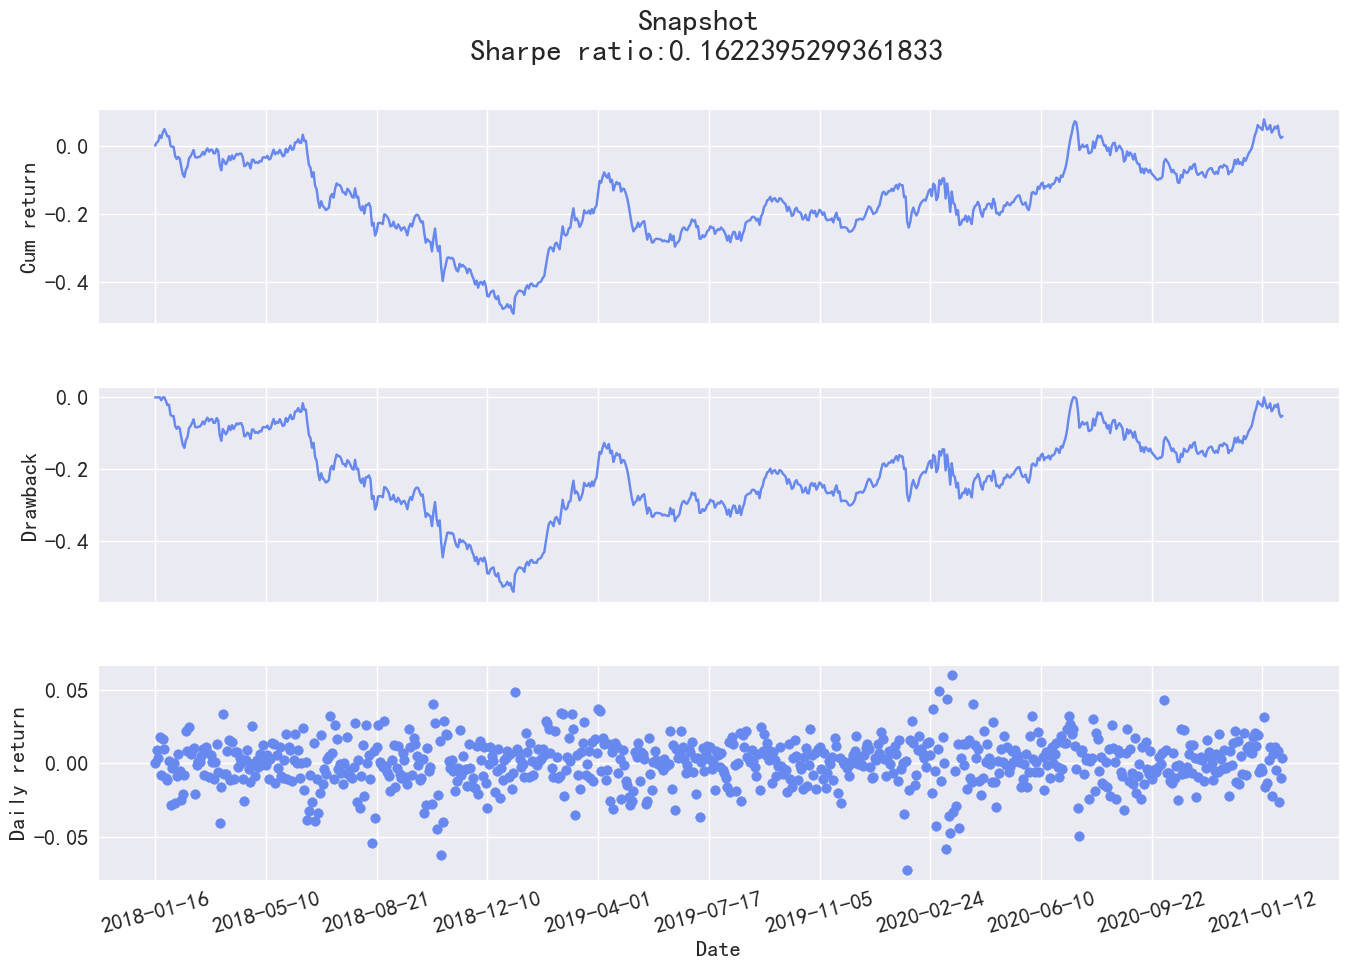

In [22]:
core.plot_rt()

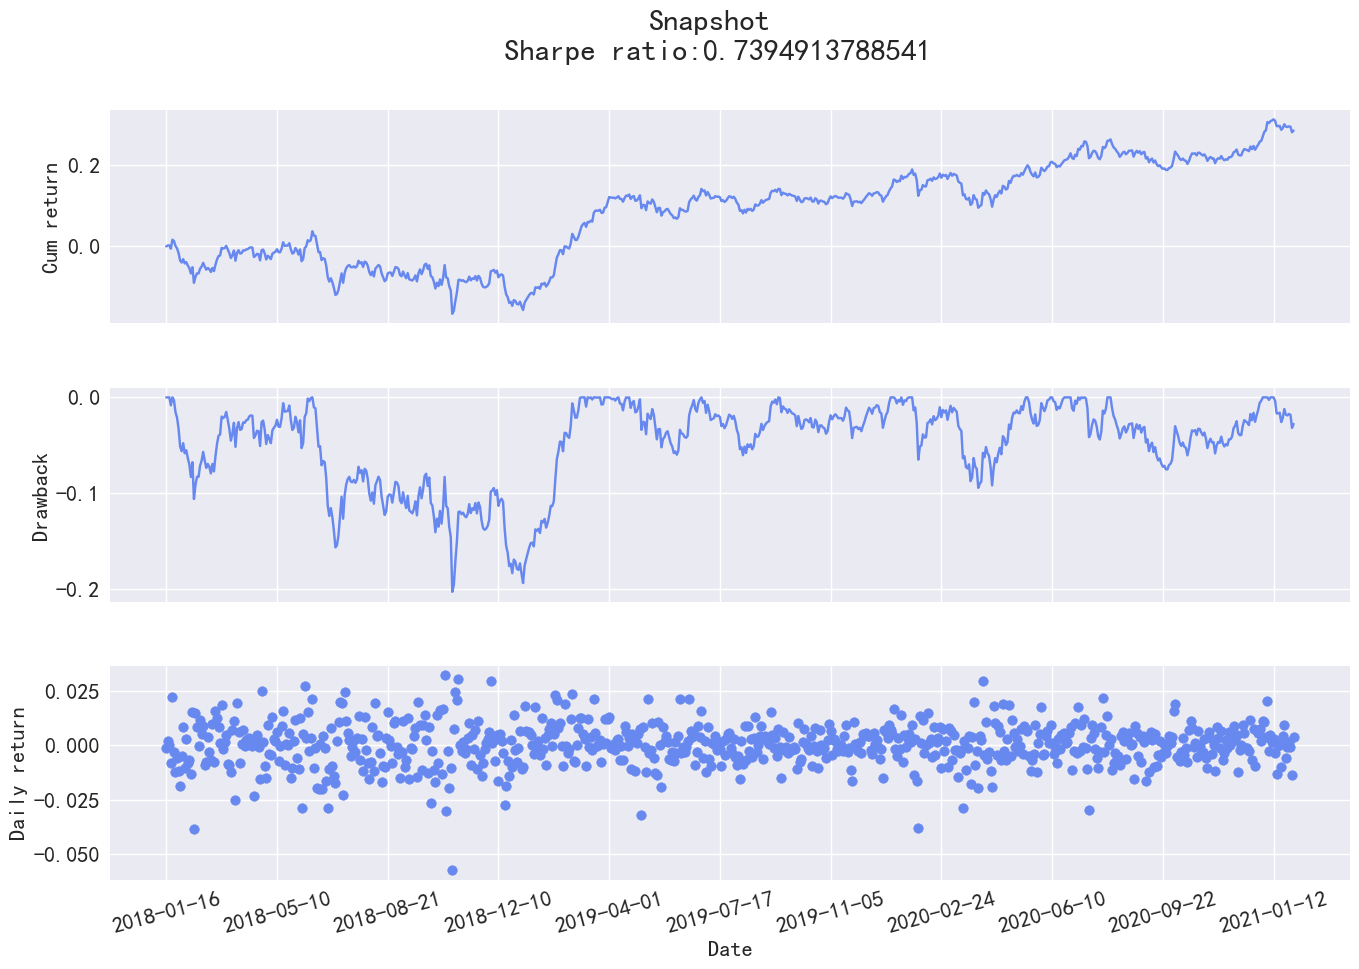

In [23]:
core.strategy[2].plot_rt()

In [25]:
def plot_s(data):
    plt.scatter(x=data.date,y=data.close,color='black',marker='_')
    plt.scatter(x=data.date,y=data.open,color='orange',marker='_')
    plt.show()

In [26]:
get_data(core.data,'600519','2020-01-20','2020-02-06')

,date,code,open,high,low,close,volume,amount,factor1,factor2,factor3
122052,2020-01-20,600519,1053.87,1053.87,1024.01,1033.01,3539130.0,3.858247e+09,0.654157,-0.078841,0.10
122053,2020-01-21,600519,1023.01,1029.01,1014.31,1017.31,3287405.0,3.542441e+09,0.367036,-0.000121,-21.13
122054,2020-01-22,600519,1012.01,1026.01,997.39,1017.52,3620004.0,3.875275e+09,-0.028727,-0.077834,-31.70
122055,2020-01-23,600519,1018.01,1018.01,979.01,994.81,5346843.0,5.638946e+09,0.291193,-0.009453,-31.99
122056,2020-02-03,600519,927.01,952.69,922.01,945.93,12344288.0,1.231499e+10,0.509525,-0.000090,-38.20
122057,2020-02-04,600519,957.01,999.01,953.02,980.02,6262418.0,6.490469e+09,0.920322,-0.000292,-71.38
122058,2020-02-05,600519,992.01,996.01,975.04,992.00,4741824.0,4.956355e+09,0.892265,-0.053502,-37.50


In [27]:
core.strategy[2].date_trade[tdt('2020-02-04')]

Index(['600519', '603833', '000596', '000661', '000858'], dtype='object', name='code')

In [28]:
core.strategy[2].future_row.sort_values(by='code')

,date,open,close,high,low,volume,amount,code
7,2019-10-16,107.59,105.30,107.59,103.60,4125649.0,4.542503e+08,000596
4,2019-03-07,121.83,121.83,121.83,121.83,404378.0,1.005526e+08,000661
2,2018-08-27,13.38,13.38,13.38,13.38,5352600.0,7.209952e+07,002310
9,2020-03-11,44.28,41.77,44.35,41.45,10024891.0,4.311225e+08,002410
3,2018-11-28,18.53,18.53,18.53,18.53,467200.0,8.657216e+06,002411
6,2019-08-21,28.06,27.96,28.31,27.89,9139844.0,6.438129e+08,002714
1,2018-04-17,38.22,36.25,38.40,35.95,30160084.0,1.175711e+09,600196
8,2020-02-06,1001.44,1013.01,1017.01,994.03,4717121.0,5.011247e+09,600519
5,2019-03-14,44.52,44.99,45.66,44.36,14384685.0,7.210033e+08,601336
0,2018-03-15,55.56,55.17,56.74,53.26,24742348.0,3.261363e+09,603799


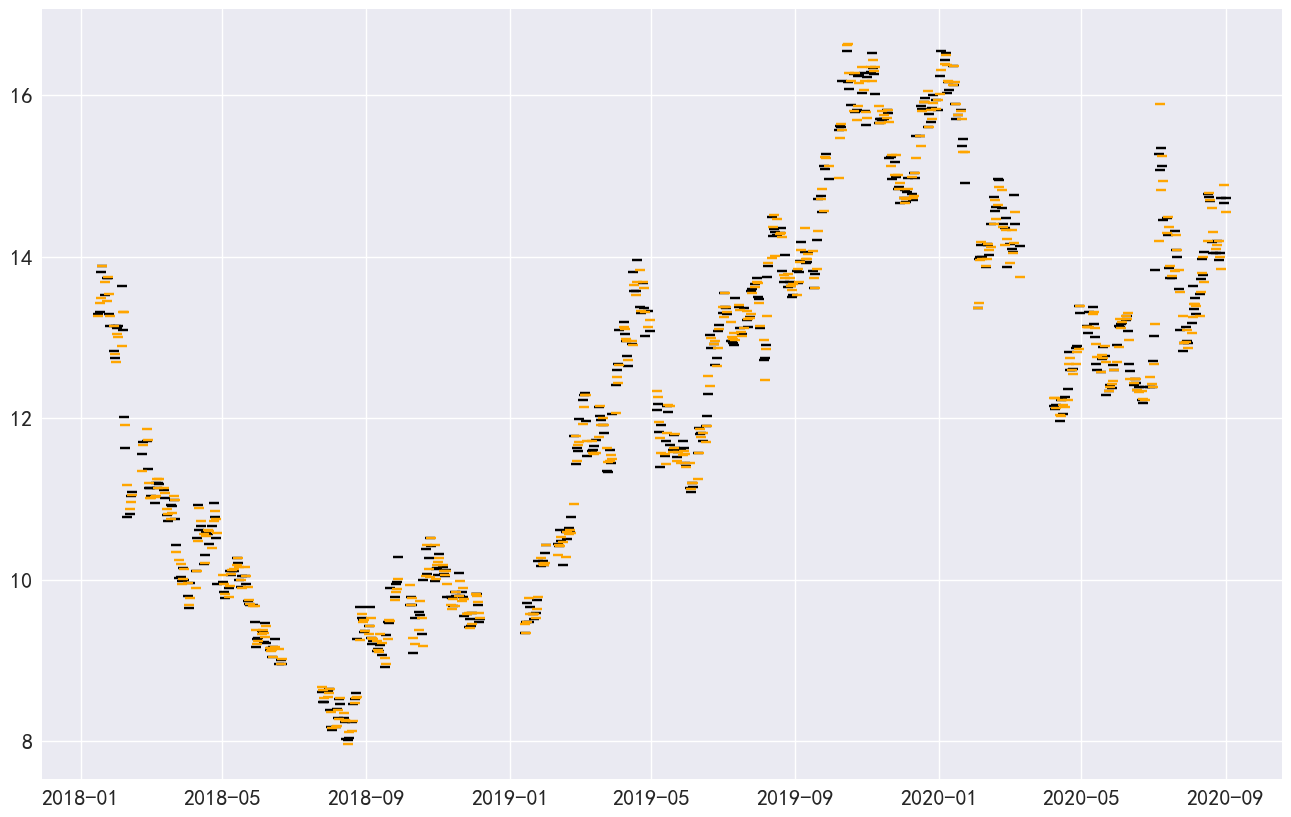

In [29]:
plot_s(get_data(core.data,'000001','2016-06-01','2020-09-01'))

In [30]:
core.trade.keys()

dict_keys(['000001', '000002', '000008', '000060', '000069', '000100', '000157', '000166', '000333', '000338', '000402', '000413', '000415', '000423', '000425', '000538', '000559', '000568', '000623', '000625', '000627', '000630', '000651', '000671', '000686', '000709', '000723', '000725', '000728', '000738', '000750', '000768', '000776', '000783', '000792', '000826', '000839', '000858', '000876', '000895', '000898', '000938', '000959', '000963', '000983', '001979', '002007', '002008', '002024', '002027', '002044', '002065', '002074', '002081', '002142', '002146', '002153', '002174', '002202', '002230', '002236', '002241', '002252', '002292', '002294', '002304', '002310', '002352', '002385', '002411', '002415', '002424', '002426', '002456', '002465', '002466', '002468', '002475', '002508', '002555', '002558', '002594', '002601', '002602', '002608', '002624', '002673', '002714', '002736', '002797', '002831', '002839', '002841', '300003', '300015', '300017', '300024', '300033', '300059',

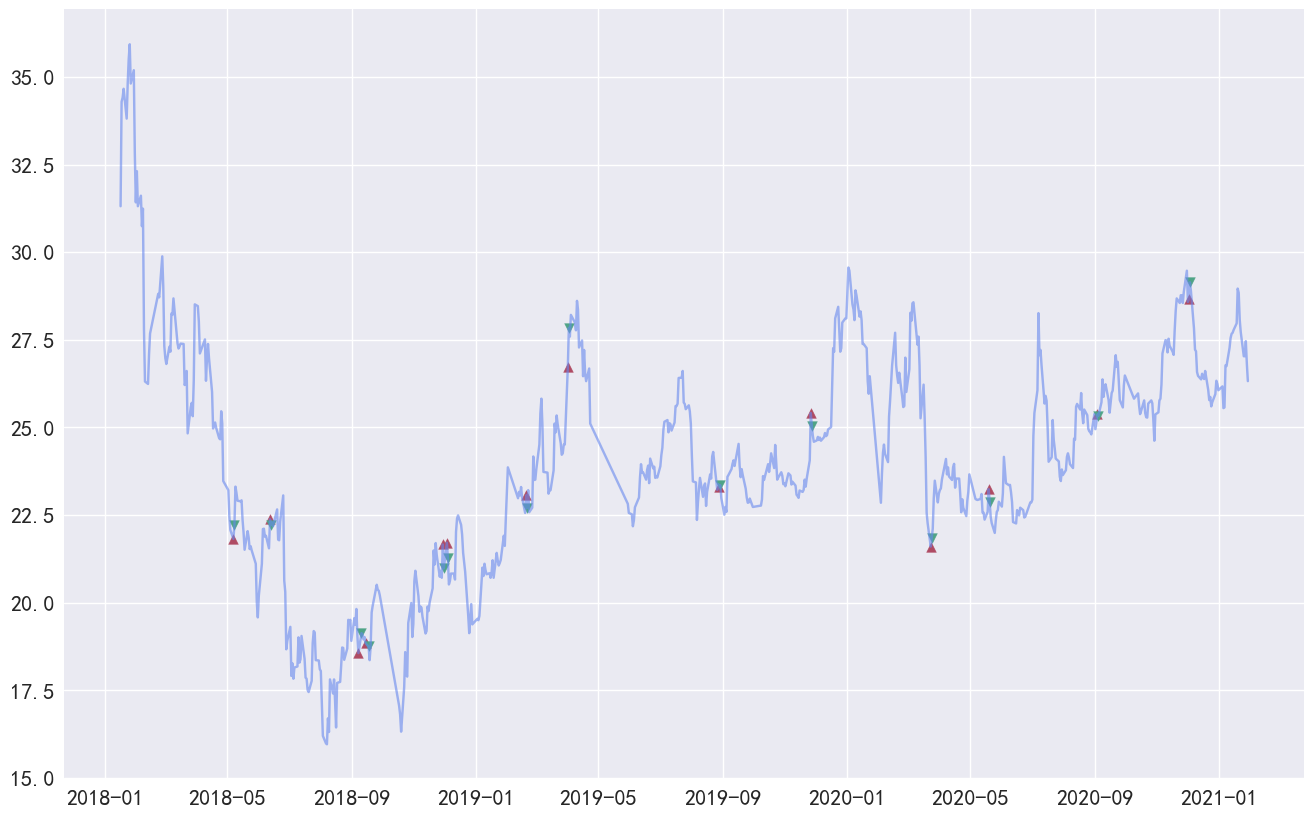

In [31]:
core.plot_trade('000002')

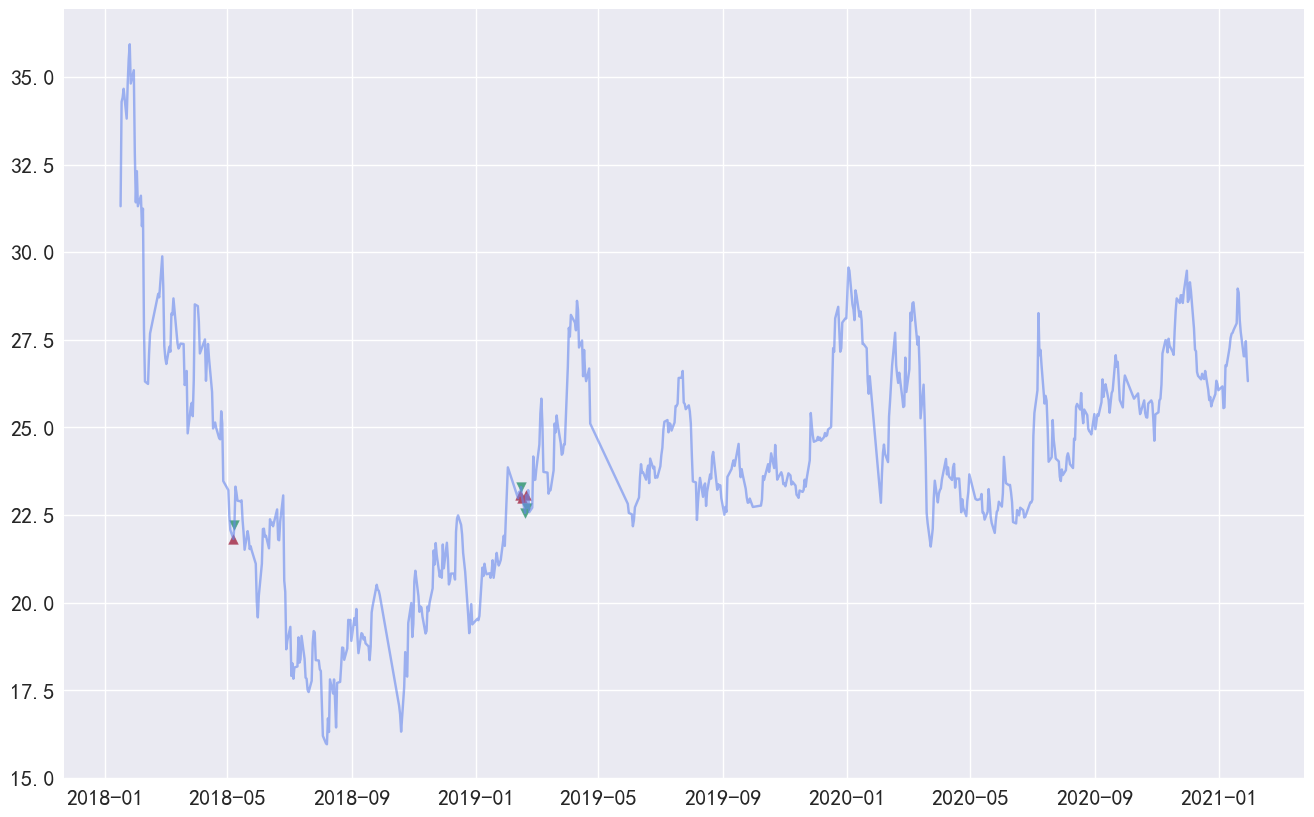

In [32]:
core.strategy[2].plot_trade(code = '000002')

In [33]:
core.strategy[0].trade['000001']

{Timestamp('2018-02-05 00:00:00'): [12.89, 775.0],
 Timestamp('2018-02-06 00:00:00'): [13.32, -775.0],
 Timestamp('2018-09-18 00:00:00'): [8.96, 1116.0],
 Timestamp('2018-09-19 00:00:00'): [9.26, -1116.0],
 Timestamp('2019-09-02 00:00:00'): [13.52, 739.0],
 Timestamp('2019-09-03 00:00:00'): [13.85, -739.0],
 Timestamp('2019-12-04 00:00:00'): [14.71, 679.0],
 Timestamp('2019-12-05 00:00:00'): [14.72, -679.0],
 Timestamp('2020-04-22 00:00:00'): [12.74, 784.0],
 Timestamp('2020-04-23 00:00:00'): [12.6, -784.0]}